In [81]:
import pandas as pd
import numpy as np

#matplotlib and seaborn are used for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('tmdb_5000_movies.csv') 
df.head()  # Preview the first few rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [86]:
df.columns #Display the column names


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [88]:
df.describe() #View basic statistics:

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Eliminate  Null Data

In [92]:
df = df.dropna(subset=['budget', 'revenue'])  # Drop rows where budget or revenue are missing


In [94]:
df = df.drop_duplicates()


In [96]:
df.duplicated().sum()


0

In [98]:
df['release_date'] = pd.to_datetime(df['release_date'])  # Convert to datetime format


In [100]:
df['release_date'] # Extract the year from release date

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4803, dtype: datetime64[ns]

### 1.Distribution of Movie Genres: Analyze the frequency of different genres:

In [105]:
genre_count = df['genres'].value_counts().head(10)  # Top 10 genres


In [107]:
genre_count

genres
[{"id": 18, "name": "Drama"}]                                                                    370
[{"id": 35, "name": "Comedy"}]                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                      142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]    109
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    88
[{"id": 99, "name": "Documentary"}]                                                               68
[{"id": 27, "name": "Horror"}]                                                                    64
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]                       

### 2.Top 10 Highest-Grossing Movies:

In [111]:
top_grossing = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)


In [113]:
top_grossing

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


### 3.Budget vs. Revenue Relationship:

In [118]:
correlation = df['budget'].corr(df['revenue'])  # Pearson correlation coefficient

In [120]:
correlation

0.7308228569244614

### 4.Trend of Movie Production Over Time:

In [124]:
df['year'] = df['release_date'].dt.year
movie_trend = df['year'].value_counts().sort_index()


In [126]:
movie_trend

year
1916.0      1
1925.0      1
1927.0      1
1929.0      2
1930.0      1
         ... 
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: count, Length: 90, dtype: int64

# Data Visualization

### 1.Bar Chart for Genre Distribution:

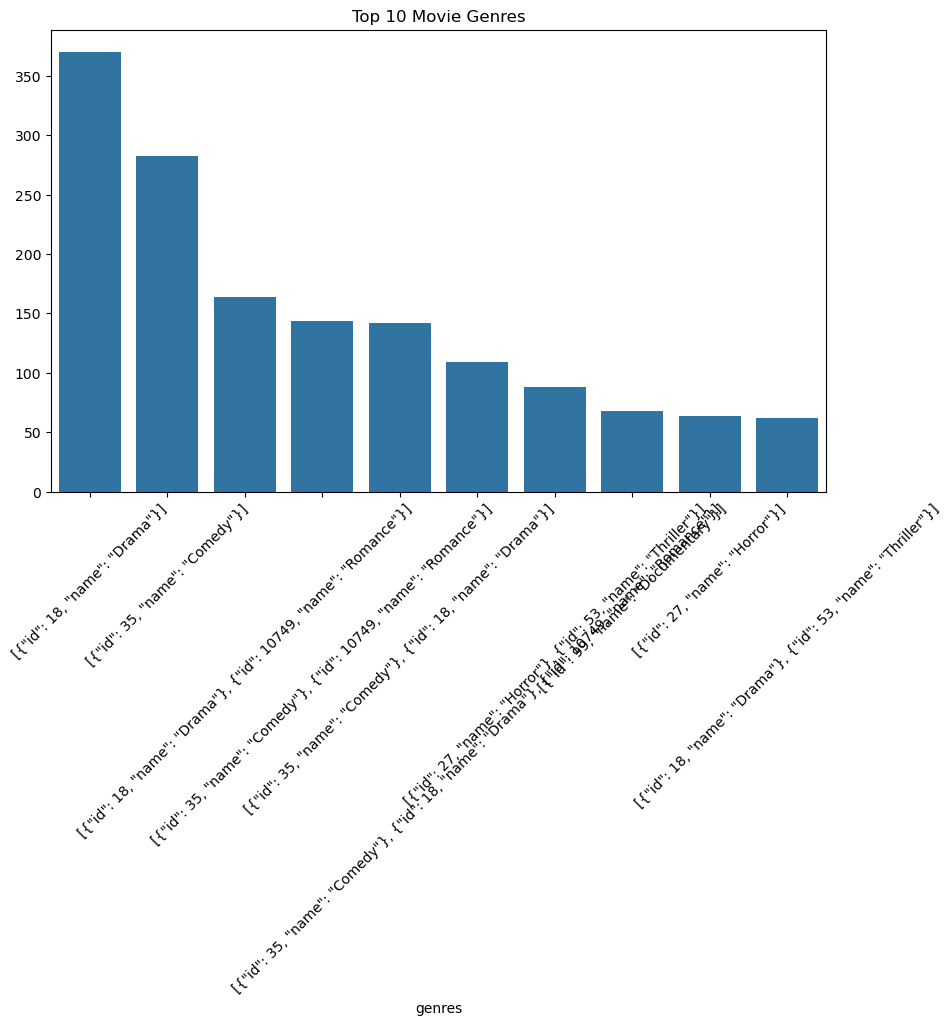

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=45)
plt.show()

## Genres: The most popular genres in the dataset are identified through the bar chart.


## 2.Scatter Plot for Budget vs Revenue:

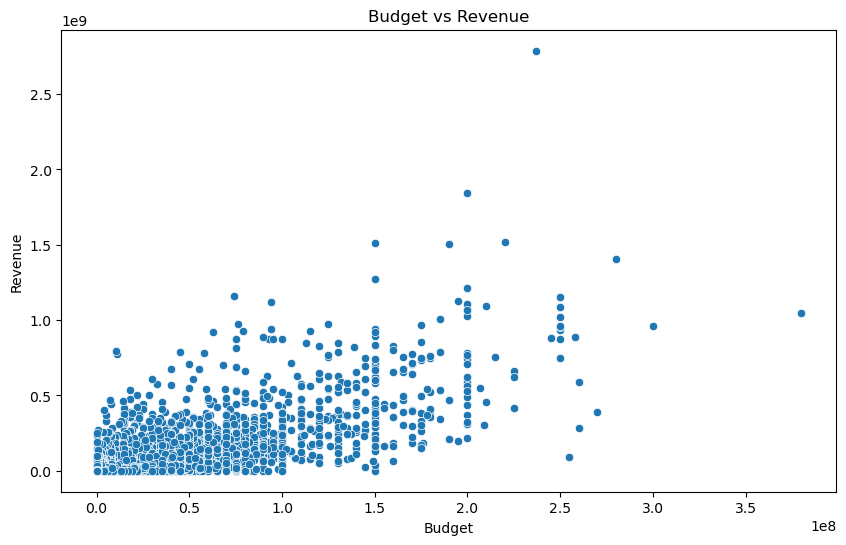

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


## Budget vs. Revenue: Correlation and scatter plot show the relationship between budget and revenue.



## 3.Line Plot for Movie Production Over Time:

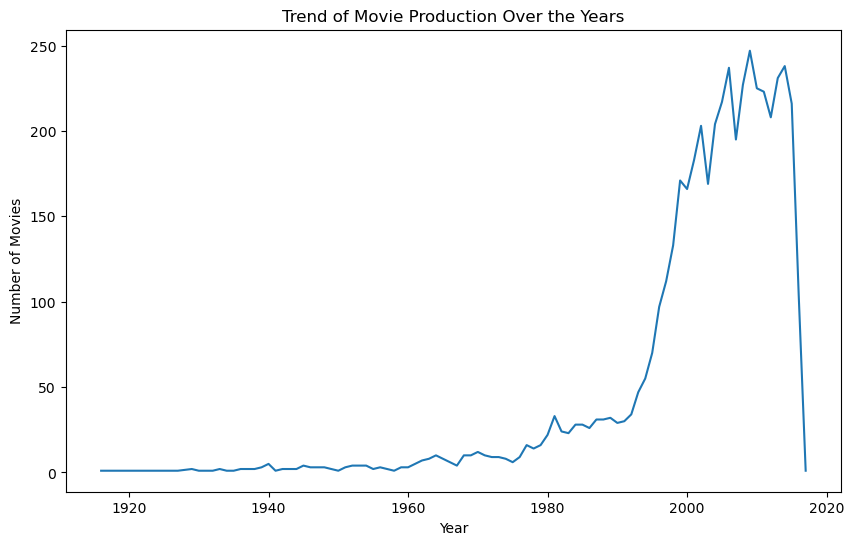

In [144]:
plt.figure(figsize=(10,6))
movie_trend.plot(kind='line')
plt.title('Trend of Movie Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


## Production Trend: The line chart visualizes movie production trends over the years.

## 4.Plot the Line Chart for Trend of Movie Production Over Time:

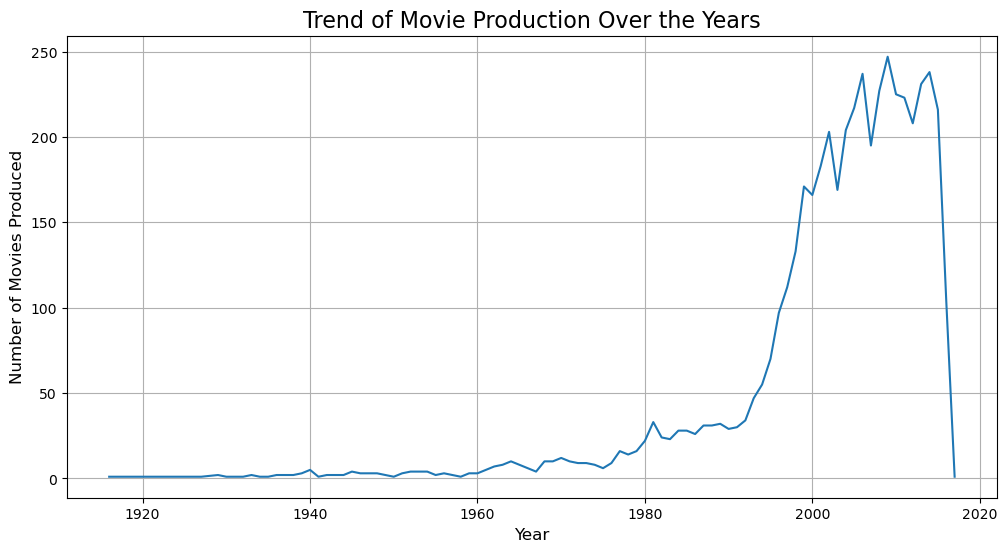

In [149]:
plt.figure(figsize=(12, 6))  # Set up the figure size


sns.lineplot(x=movie_trend.index, y=movie_trend.values) # Plot the trend using seaborn's lineplot

# Add labels and title
plt.title('Trend of Movie Production Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies Produced', fontsize=12)

# Display the plot
plt.grid(True)  # Add grid for better readability
plt.show()

## Top 10 Highest-Grossing Movies: Display the title and revenue of the highest-grossing movies.
